In [17]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings
warnings.filterwarnings("ignore")
path = "C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Giada/"
path_df = "C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Tweets/"
path_files = "C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Files/"
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/tweet_utils'
sys.path.append(path_utils)
import utils

# Indice

- [Import and read](#import)
- [Hashtags](#hashtags)
- [Split](#split)
- [Retweet network - Leiden](#nt_l)
- [Retweet network - Louvain](#nt_l2)
- [YouTube](#yt)

# Import and read Data
<a id="import"/>

In [33]:
good = pd.read_csv(path + "good.csv")
bad = pd.read_csv(path + "bad.csv")
good_lst = list(good["screen_name"])
bad_lst = list(bad["screen_name"])
good_rt = pd.read_csv(path_df + "good_rt.csv")
bad_rt = pd.read_csv(path_df + "bad_rt.csv")
good_lst = list(good["screen_name"])
bad_lst = list(bad["screen_name"])
good_rt_lst = list(good_rt["screen_name"])
bad_rt_lst = list(bad_rt["screen_name"])

In [34]:
# df = pd.read_parquet(path_df + "tweets.parquet", engine="fastparquet")
# good_activities = df[df["user_screen_name"].isin(good_lst)]
# bad_activities = df[df["user_screen_name"].isin(bad_lst)]
# rt_in_good = df[df["rt_user_screen_name"].isin(good_lst)]
# rt_in_bad = df[df["rt_user_screen_name"].isin(bad_lst)]
# good_activities.to_csv(path_df + "good_activities.csv", encoding="utf-8", line_terminator="\n", index=False)
# bad_activities.to_csv(path_df + "bad_activities.csv", encoding="utf-8", line_terminator="\n", index=False)
# rt_in_bad.to_csv(path_df + "rt_in_bad.csv", encoding="utf-8", line_terminator="\n", index=False)
# rt_in_good.to_csv(path_df + "rt_in_good.csv", encoding="utf-8", line_terminator="\n", index=False)

In [35]:
good_activities = pd.read_csv(path_df + "good_activities.csv", encoding="utf-8", lineterminator="\n", low_memory=False)
bad_activities = pd.read_csv(path_df + "bad_activities.csv", encoding="utf-8", lineterminator="\n", low_memory=False)
rt_in_bad = pd.read_csv(path_df + "rt_in_bad.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
rt_in_good = pd.read_csv(path_df + "rt_in_good.csv", lineterminator="\n", low_memory=False, encoding="utf-8")

# Hashtags
<a id="hashtags"/>

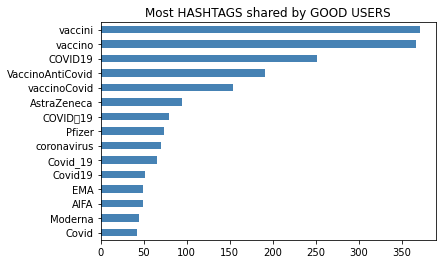

In [75]:
lst_prova = utils.hashtag_process_list(good_activities["hashtags"])
lst_prova_2 = [i for i in lst_prova if i != "[]"]
lst_prova_3 = []
for i in lst_prova_2:
    for j in i:
        lst_prova_3.append(j)
val = pd.Series(lst_prova_3).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='steelblue')
ax.set_title('Most HASHTAGS shared by GOOD USERS')
ax.invert_yaxis()
plt.show()

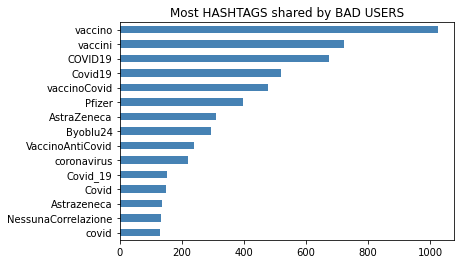

In [76]:
lst_prova = utils.hashtag_process_list(bad_activities["hashtags"])
lst_prova_2 = [i for i in lst_prova if i != "[]"]
lst_prova_3 = []
for i in lst_prova_2:
    for j in i:
        lst_prova_3.append(j)
val = pd.Series(lst_prova_3).value_counts().sort_values(ascending=False)
fig = plt.figure()
ax = val[:15].plot(kind='barh', color='steelblue')
ax.set_title('Most HASHTAGS shared by BAD USERS')
ax.invert_yaxis()
plt.show()

In [87]:
hs_sage = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/sage/data/outfile_good_bad_hs.csv")
hs_sage_good = hs_sage[16:][["word"]].reset_index(drop=True)
hs_sage_bad = hs_sage[:15][["word"]].reset_index(drop=True)

In [88]:
print("Good hs")
hs_sage_good

Good hs


,word
0,lavitaindiretta
1,robertoburioni
2,ifattivostri
3,regioni
4,gimbe
5,unomattina
6,vaccinale
7,decretoriaperture
8,forrest
9,lalaura


In [89]:
print("Bad hs")
hs_sage_bad

Bad hs


,word
0,nessunacorrelazione
1,byoblu24
2,dittaturasanitaria
3,billgates
4,quartarepubblica
5,speranza
6,bassetti
7,lockdown
8,ue
9,burioni


In [90]:
txt_sage = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/sage/data/outfile_good_bad_txt.csv")
txt_sage_good = txt_sage[16:][["word"]].reset_index(drop=True)
txt_sage_bad = txt_sage[:15][["word"]].reset_index(drop=True)

In [94]:
print("Good hs")
txt_sage_good

Good hs


,word
0,lavitaindiretta
1,robertoburioni
2,gimbe
3,vaccinovigilanza
4,giando
5,ifattivostri
6,aiuteranno
7,oroscopo
8,integrare
9,unomattina


In [93]:
print("Bad hs")
txt_sage_bad

Bad hs


,word
0,gates
1,massa
2,sperimentale
3,vogliono
4,reazioni
5,obbligo
6,medici
7,governo
8,morti
9,dopo


# Split
<a id="split"/>

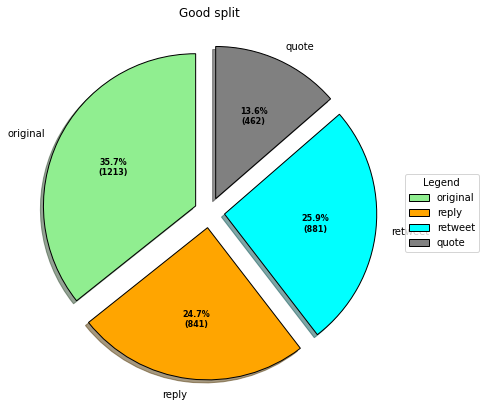

In [71]:
x = utils.split(good_activities)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("Good split", labels, values)

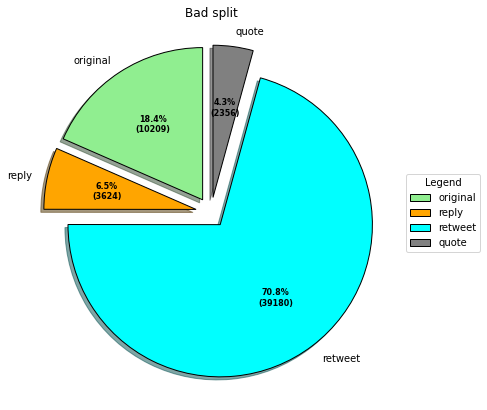

In [72]:
x = utils.split(bad_activities)
labels = list(x.keys())
values = list(x.values())
utils.print_pie_chart4("Bad split", labels, values)

# Rt network - Leiden
<a id="nt_l"/>

In [11]:
leiden = pd.read_csv(path_files + "leiden.csv")
pd.Series(leiden[leiden["user"].isin(bad_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

2       12606
4         332
3         320
1         235
5         193
        ...  
2589        1
3189        1
1169        1
271         1
353         1
Name: community, Length: 100, dtype: int64

In [12]:
pd.Series(leiden[leiden["user"].isin(good_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

0       25727
3        2816
1        2463
4        1897
7         166
        ...  
349         1
1031        1
214         1
777         1
38          1
Name: community, Length: 114, dtype: int64

# Rt network - Louvain
<a id="nt_l2"/>

In [9]:
louvain = pd.read_csv(path_files + "louvain.csv")
pd.Series(louvain[louvain["name"].isin(bad_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

4       12844
3         455
2         206
0         198
34        174
        ...  
3382        1
3481        1
3493        1
361         1
3583        1
Name: community, Length: 61, dtype: int64

In [10]:
pd.Series(louvain[louvain["name"].isin(good_rt_lst)]["community"]).value_counts().sort_values(ascending=False)

0       25394
3        3458
2        3258
5         746
1         217
        ...  
619         1
2691        1
144         1
2867        1
126         1
Name: community, Length: 113, dtype: int64

# YouTube
<a id="yt"/>

In [30]:
# tweets = pd.read_parquet(path_df + "tweets_with_urls_and_domain_and_score (3.0).parquet", engine = "fastparquet")
# yt_df = pd.read_csv(path + "youtube_info.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
# yt_df

In [31]:
# cont = 0
# yt_urls = list(yt_df["url"])
# name = []
# urls = []
# for i in tqdm(tweets.itertuples()):
#     cont = cont + 1
#     splitted = i.urls.split(" ")
#     for index in range(len(splitted)):
#         if splitted[index] == "'expanded_url':":
#             expanded = splitted[index+1][1:-2]
#             if expanded in yt_urls:
#                 name.append(i.user_screen_name)
#                 urls.append(expanded)
# yt_present = pd.DataFrame(list(zip(name,urls)), columns = ["screen_name", "url"])
# merged = yt_present.merge(yt_df, on="url", how="left")
# merged.to_csv(path_df + "yt_info.csv", line_terminator="\n", encoding="utf-8", index=False)

In [45]:
yt_df = pd.read_csv(path_df + "yt_info.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
yt_df

,screen_name,url,title,description,type,available,reason,occurrency
0,Graziel65255465,https://youtu.be/-gdwEs4Ficw,"Libertà, Libertà",NaN,compressed,True,Parsed,2
1,xenonian1,https://youtu.be/DouCbWbLa7E,vaccini mortali ai militari - sindrome senza b...,non è l'URANIO sono i VACCINI che hanno fatto ...,compressed,True,Parsed,5
2,xenonian1,https://youtu.be/AwRqhGfRAlc,vaccini mortali ai militari - sindrome senza b...,non è l'Uranio ma i VACCINI: più di 1400 milit...,compressed,True,Parsed,2
3,MFulvia,https://youtu.be/HB994BBNLok,Nota Vocale per la Giornata della Memoria,#NotaVocale alla #Memoria...Non ti dimenticare...,compressed,True,Parsed,6
4,bluebird19473,https://youtu.be/8pC1xwFfS_g,NaN,NaN,compressed,False,Unavailable,1
...,...,...,...,...,...,...,...,...
20590,DiegoDan80,https://youtu.be/XEQ2-jssdFI,Nido del Cuculo - Roberto Scimmiato,ridoppiaggio in livornese di un film horror,compressed,True,Parsed,1
20591,Euro_comunica,https://youtu.be/FoZJXSbclZA,"Oms, per i Paesi più poveri mancano i vaccini....","Mentre in Germania dal 7 giugno tutti, dai 16 ...",compressed,True,Parsed,1
20592,KattInForma,https://youtu.be/6VHVvogoyTE,Vaccini: anticorpi e immunità. Stop mascherine...,"Il Prof. Francesco Broccolo, Docente di Microb...",compressed,True,Parsed,1
20593,KattInForma,https://youtu.be/j2-Guu_no_8,Vaccino e seconda dose. Pressione alta e cibi....,"La Dott.ssa Roberta Rettagliati, medico di fam...",compressed,True,Parsed,1


In [46]:
bad_yt = yt_df[yt_df["screen_name"].isin(bad_lst)]
pd.Series(bad_yt["reason"]).value_counts().sort_values(ascending=False)

Parsed         2948
Unavailable     765
Name: reason, dtype: int64